In [37]:
import os
os.environ['XLA_PYTHON_CLIENT_MEM_FRACTION'] = '.2'

from algorithms.utils import restore_state_multi_agent
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [38]:
directory = '/media/samuele/Disco/PycharmProjectsUbuntu/MARL-CER/trained_agents/server_16-17/20250417_162628_bat_net_type_recurrent_actor_critic_rec_net_type_recurrent_actor_critic_lr_bat_5e-05_lr_REC_cosine_tot_timesteps_14016000_lr_sched_cosine_multiagent'

networks_batteries, network_rec, config, world_metadata, train_info, val_info = restore_state_multi_agent(directory)

{'ACTIVATION': 'tanh', 'BATTERY_ACTION_SPACE_SIZE': 1, 'BATTERY_OBS_IS_NORMALIZABLE': {'buying_price': True, 'cos_day_of_year': False, 'cos_seconds_of_day': False, 'demand': True, 'generation': True, 'network_REC_minus': True, 'network_REC_plus': True, 'rec_value': True, 'selling_price': True, 'sin_day_of_year': False, 'sin_seconds_of_day': False, 'soc': False, 'temperature': True}, 'BATTERY_OBS_IS_SEQUENCE': {'buying_price': True, 'cos_day_of_year': False, 'cos_seconds_of_day': False, 'demand': True, 'generation': True, 'network_REC_minus': True, 'network_REC_plus': True, 'rec_value': True, 'selling_price': True, 'sin_day_of_year': False, 'sin_seconds_of_day': False, 'soc': True, 'temperature': True}, 'BATTERY_OBS_KEYS': ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus'), 'BATTERY_OBS_KEYS_CRI': ('temperature', 'soc', 'demand', 'genera

In [39]:
config

{'ACTIVATION': 'tanh',
 'BATTERY_ACTION_SPACE_SIZE': 1,
 'BATTERY_OBS_IS_NORMALIZABLE': {'buying_price': True,
  'cos_day_of_year': False,
  'cos_seconds_of_day': False,
  'demand': True,
  'generation': True,
  'network_REC_minus': True,
  'network_REC_plus': True,
  'rec_value': True,
  'selling_price': True,
  'sin_day_of_year': False,
  'sin_seconds_of_day': False,
  'soc': False,
  'temperature': True},
 'BATTERY_OBS_IS_SEQUENCE': {'buying_price': True,
  'cos_day_of_year': False,
  'cos_seconds_of_day': False,
  'demand': True,
  'generation': True,
  'network_REC_minus': True,
  'network_REC_plus': True,
  'rec_value': True,
  'selling_price': True,
  'sin_day_of_year': False,
  'sin_seconds_of_day': False,
  'soc': True,
  'temperature': True},
 'BATTERY_OBS_KEYS': ('temperature',
  'soc',
  'demand',
  'generation',
  'buying_price',
  'selling_price',
  'sin_day_of_year',
  'cos_day_of_year',
  'sin_seconds_of_day',
  'cos_seconds_of_day',
  'network_REC_plus',
  'network_REC

In [40]:
world_metadata

WorldMetadata(world_train={'num_battery_houses': 3, 'battery_observations': ['demand', 'generation', 'temperature', 'soc', 'day_of_year', 'seconds_of_day', 'selling_price', 'buying_price', 'network_REC_plus', 'network_REC_minus'], 'rec_observations': ['demands_base_battery_houses', 'demands_battery_battery_houses', 'generations_base_battery_houses', 'mean_demands_base', 'mean_demands_batteries', 'mean_generations', 'day_of_year', 'seconds_of_day', 'network_REC_plus', 'network_REC_minus', 'rec_actions_prev_step'], 'demand': {'path': 'ernestogym/ernesto_jax/data/demand/rse_profiles_train.csv', 'timestep': 3600, 'test_profiles': None, 'data_usage': 'end'}, 'generation': {'path': {'battery_houses_generation': ['ernestogym/ernesto_jax/data/generation/Timeseries_45.235_10.693_SA3_3kWp_crystSi_14_30deg_-60deg_2015_2018._train.csv', 'ernestogym/ernesto_jax/data/generation/Timeseries_45.235_10.693_SA3_3kWp_crystSi_14_30deg_0deg_2015_2018._train.csv', 'ernestogym/ernesto_jax/data/generation/Time

In [41]:
jax.tree.map(lambda x: jnp.isnan(x).any(axis=jnp.arange(1, x.ndim)), train_info)

{}

In [42]:
jax.tree.map(lambda x: x.shape, val_info)

{'actions_batteries': (22, 43350, 3),
 'actions_rec': (22, 43350, 3),
 'balance_minus': (22, 43350),
 'balance_plus': (22, 43350),
 'buy_prices': (22, 43350, 3),
 'demands': (22, 43350, 3),
 'dones': {'REC_agent': (22, 43350),
  '__all__': (22, 43350),
  'battery_agent_0': (22, 43350),
  'battery_agent_1': (22, 43350),
  'battery_agent_2': (22, 43350)},
 'energy_to_batteries': (22, 43350, 3),
 'generations': (22, 43350, 3),
 'norm_reward': {'r_clipping': (22, 43350, 3),
  'r_deg': (22, 43350, 3),
  'r_glob': (22, 43350, 3),
  'r_op': (22, 43350, 3),
  'r_trad': (22, 43350, 3)},
 'pure_reward': {'r_clipping': (22, 43350, 3),
  'r_deg': (22, 43350, 3),
  'r_glob': (22, 43350, 3),
  'r_op': (22, 43350, 3),
  'r_trad': (22, 43350, 3)},
 'r_tot': (22, 43350, 3),
 'rec_reward': (22, 43350),
 'self_consumption': (22, 43350),
 'sell_prices': (22, 43350, 3),
 'soc': (22, 43350, 3),
 'soh': (22, 43350, 3),
 'tot_incentives': (22, 43350),
 'weig_reward': {'r_clipping': (22, 43350, 3),
  'r_deg': 

In [43]:
val_info['r_tot'].shape #.sum(axis=(1, 2)).shape

(22, 43350, 3)

In [44]:
lim = config['NUM_RL_AGENTS'] if 'NUM_RL_AGENTS' in config.keys() else config['NUM_BATTERY_AGENTS']
a = val_info['r_tot'][..., :lim].sum(axis=(1, 2))
a

array([-1148.8816 , -1032.2598 ,  -997.1651 ,  -955.75287,  -912.7575 ,
        -857.87836,  -825.34076,  -824.5759 ,  -799.9577 ,  -845.6612 ,
        -869.90375,  -831.07605,  -848.3148 ,  -838.37787,  -821.6814 ,
        -821.00757,  -811.7738 ,  -812.81995,  -816.60944,  -818.718  ,
        -823.87933,  -823.4833 ], dtype=float32)

In [45]:
val_info['r_tot'].shape

(22, 43350, 3)

In [46]:
val_info['r_tot'][7, :].sum(axis=0)

array([  -824.57336, -83062.87   ,  -1103.4072 ], dtype=float32)

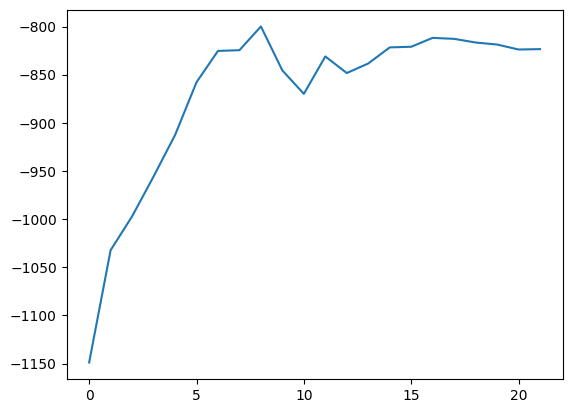

In [47]:
plt.plot(a)

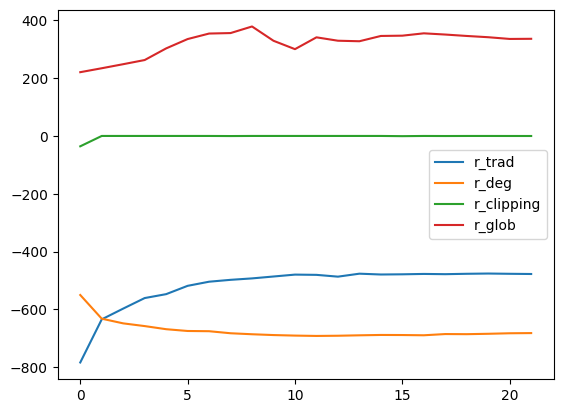

In [48]:
plt.plot(val_info['weig_reward']['r_trad'][..., :lim].sum(axis=(1, 2)), label='r_trad')
plt.plot(val_info['weig_reward']['r_deg'][..., :lim].sum(axis=(1, 2)), label='r_deg')
plt.plot(val_info['weig_reward']['r_clipping'][..., :lim].sum(axis=(1, 2)), label='r_clipping')
plt.plot(val_info['weig_reward']['r_glob'][..., :lim].sum(axis=(1, 2)), label='r_glob')
plt.legend()

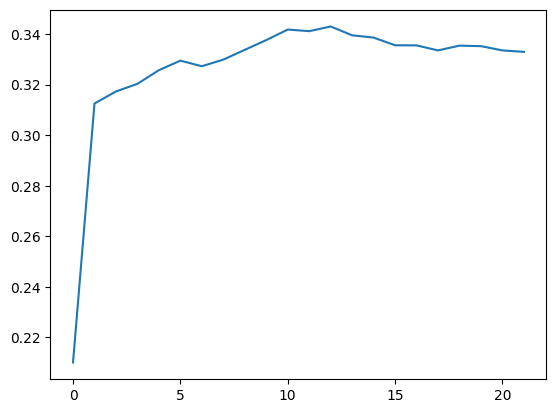

In [49]:
plt.plot(val_info['soc'][..., :lim].mean(axis=(1, 2)))

In [50]:
val_info['rec_reward'].sum(axis=1)

array([7140739., 7508737., 8160377., 8580899., 9056481., 9236284.,
       9276179., 9605640., 9658008., 9636525., 9605706., 9730594.,
       9668293., 9605121., 9545837., 9624327., 9722273., 9541937.,
       9498762., 9416405., 9356977., 9338132.], dtype=float32)

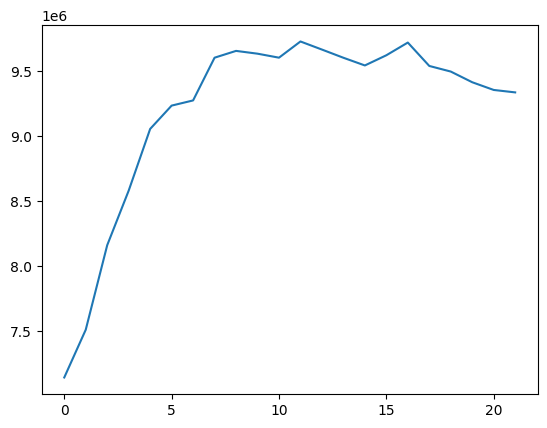

In [51]:
plt.plot(val_info['rec_reward'].sum(axis=1))

In [52]:
np.var(val_info['actions_rec'], axis=-1).shape

(22, 43350)

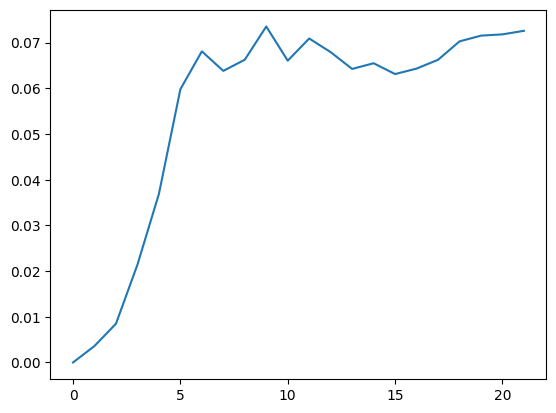

In [53]:
plt.plot(np.var(val_info['actions_rec'], axis=-1).mean(axis=1))

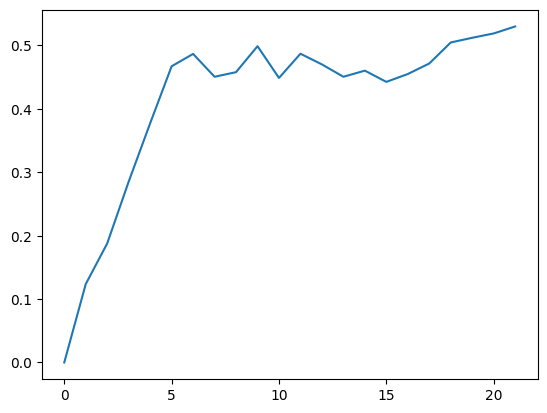

In [54]:
plt.plot(np.mean(np.max(val_info['actions_rec'], axis=-1) - np.min(val_info['actions_rec'], axis=-1), axis=1))